In [1]:
%matplotlib inline
import plot_helpers as ph
from plot_helpers import PlotDef, DataEntry

In [2]:

adult_datafiles = [
    ('../results/parity_min_max/adult_race_numerical-binsensitive.csv', 'Adult (race)'),
    ('../results/parity_min_max/adult_sex_numerical-binsensitive.csv', 'Adult (sex)'),
]

In [8]:
def label_change(label):
    parts = label.split('_')
    num = parts[-1]
    in_True = parts[4] == "True"
    optional_star = "*" if in_True else ""
    return f"FairGPparity{optional_star}, $\\beta$={num}", in_True

def filter_algos(label):
    return "True" in label

data = ph.parse_all(adult_datafiles, filter_algos, label_change)

In [9]:
# reorder the entries
for i, d in enumerate(data):
    data[i] = d._replace(entries=d.entries[5:] + d.entries[:5])

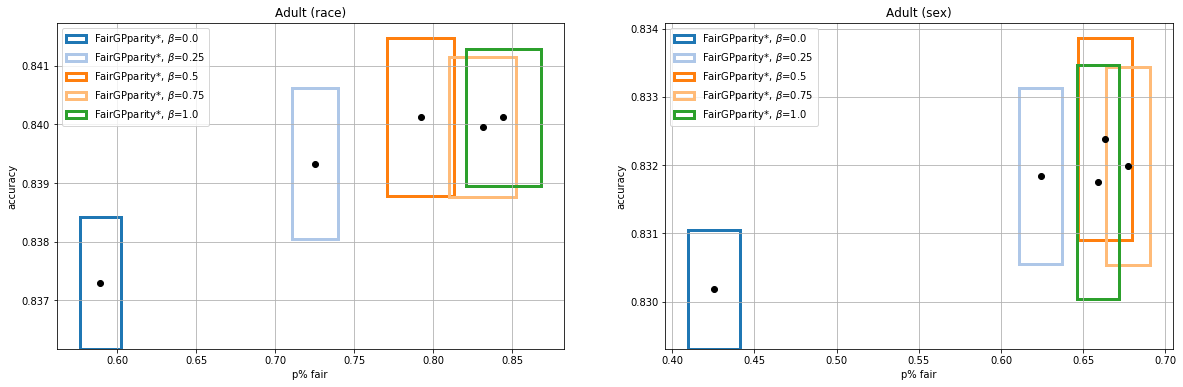

In [10]:
xaxis = ('DIbinary', 'p% fair')
yaxis = ('accuracy', 'accuracy')
ph.errorbox(data, xaxis, yaxis)